<a href="https://colab.research.google.com/github/amikoshimrah/sothingshimrah/blob/main/Predict_Medical_Insurance_Costs_Based_on_Individual_Attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load and Explore the Data**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Load the insurance Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/insurance.csv')

In [ ]:
# Display basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Display first and last few rows
print(df.head())
print(df.tail())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Inference : Step 1: Data Exploration**

The dataset contains demographic and lifestyle attributes (age, sex, bmi, children, smoker, region) and the insurance charges (charges) as the target variable.

No missing values were found, ensuring a clean dataset.

Initial summary statistics showed that age, BMI, and charges have high variability, indicating possible strong predictors.

**Step 2: Data Visualization**

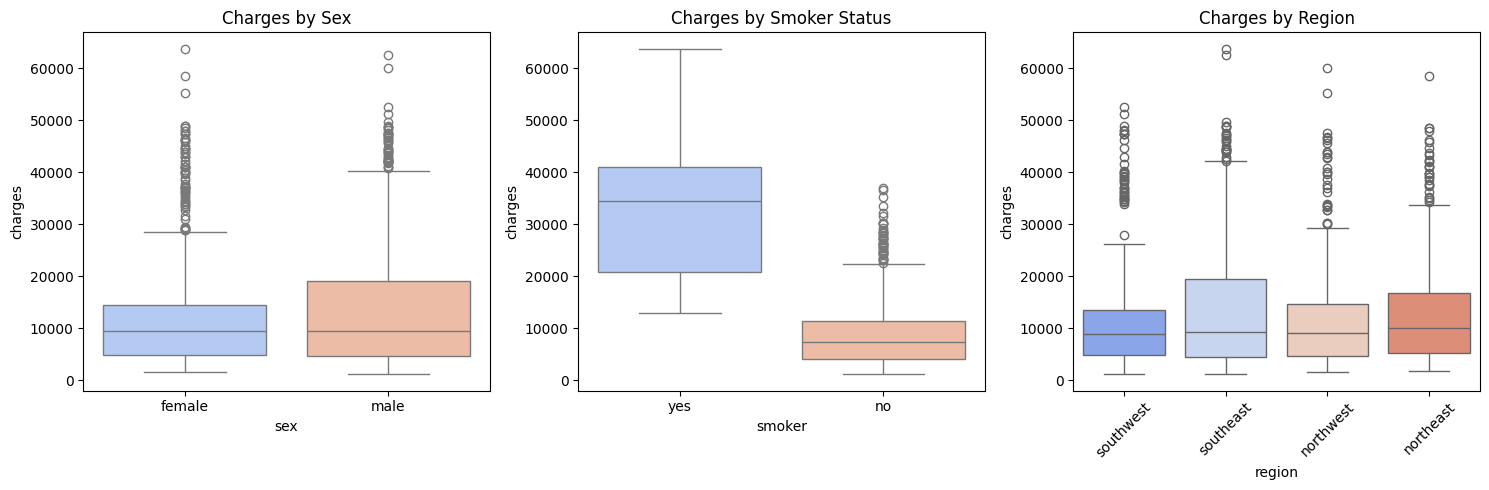

In [ ]:
#Box plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot for Sex vs Charges
sns.boxplot(x="sex", y="charges", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Charges by Sex")

# Boxplot for Smoker vs Charges
sns.boxplot(x="smoker", y="charges", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Charges by Smoker Status")

# Boxplot for Region vs Charges
sns.boxplot(x="region", y="charges", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Charges by Region")
axes[2].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


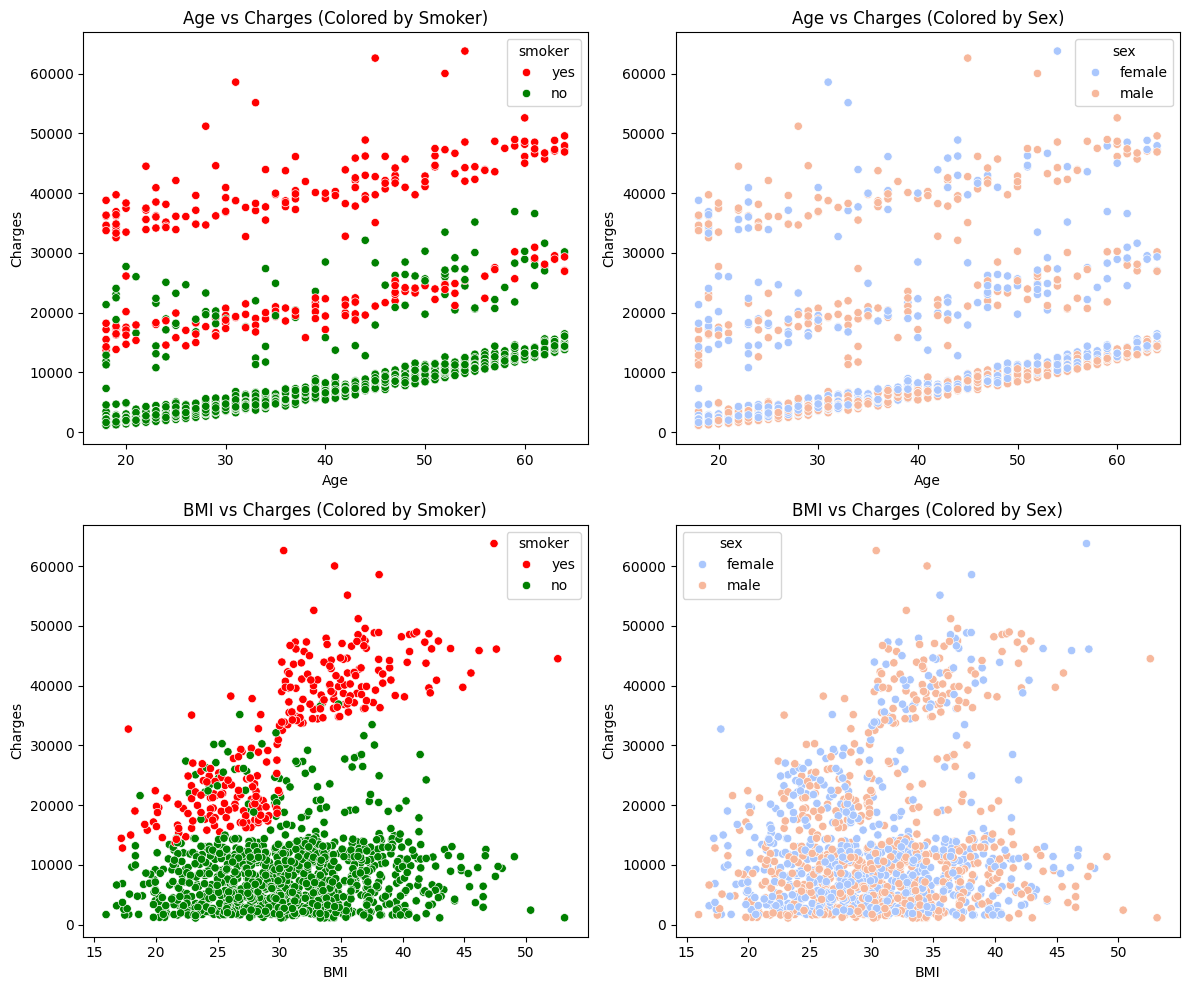

In [ ]:
# Scatter plot for age colored by categorical fields

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Custom color mapping for smoker (Yes = Red, No = Green)
smoker_palette = {"yes": "red", "no": "green"}

# Scatterplot for Age vs Charges hue - smoker
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, palette=smoker_palette, ax=axes[0, 0])
axes[0, 0].set_title("Age vs Charges (Colored by Smoker)")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Charges")

# Scatterplot for Age vs Charges hue - sex
sns.scatterplot(x="age", y="charges", hue="sex", data=df, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Age vs Charges (Colored by Sex)")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Charges")

# Scatterplot for BMI vs Charges hue - smoker
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette=smoker_palette, ax=axes[1, 0])
axes[1, 0].set_title("BMI vs Charges (Colored by Smoker)")
axes[1, 0].set_xlabel("BMI")
axes[1, 0].set_ylabel("Charges")

# Scatterplot for BMI vs Charges hue - sex
sns.scatterplot(x="bmi", y="charges", hue="sex", data=df, palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("BMI vs Charges (Colored by Sex)")
axes[1, 1].set_xlabel("BMI")
axes[1, 1].set_ylabel("Charges")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



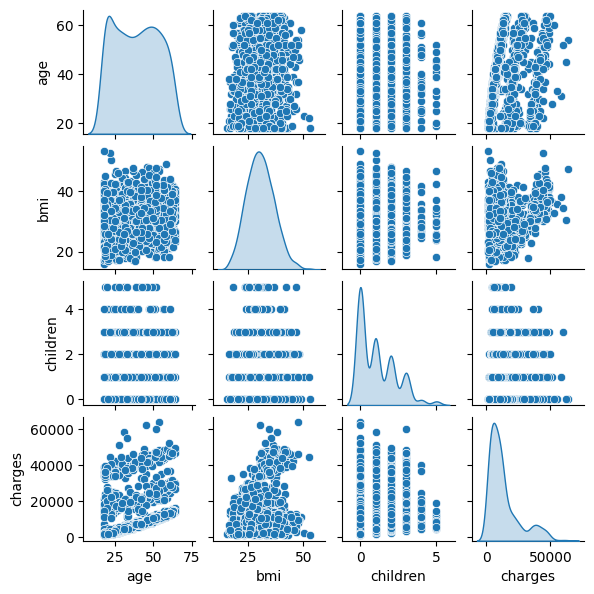

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde',height=1.5)
plt.show()


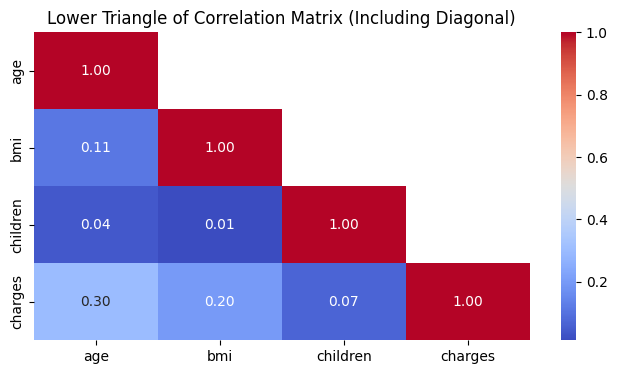

In [ ]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Create a mask for the upper triangle (excluding diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)  # k=1 keeps the diagonal visible

# Set up the figure
plt.figure(figsize=(8, 4))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Lower Triangle of Correlation Matrix (Including Diagonal)")
plt.show()


**Inferences: Step 2: Data Visualization**

The charges variable shows a skewed distribution, meaning some individuals have significantly higher charges.

The smoker feature has a strong positive impact on charges.

Age and BMI appear positively correlated with charges, suggesting older and higher BMI individuals tend to pay more.


smoker has the highest correlation with charges (strong positive impact).

age and bmi also show moderate correlations.

Other variables (sex, children, region) have weak correlations, meaning they might be less important.



**Step 3: Data Preprocessing**

Convert categorical variables (sex, smoker, region) into numerical format using one-hot encoding.

Split the dataset into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define independent (X) and dependent (y) variables
X = df.drop(columns=['charges'])
y = df['charges']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (fit on training set, transform both train and test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)  # Only transform test data




**Inferences: Step 3: Data Preprocessing**

One-hot encoding was applied to categorical variables (sex, smoker, region).

Data was split into Training (80%) and Test (20%) sets to ensure unbiased evaluation.

**Step 4: Train a Simple Linear Regression Model**

Predict charges using only one independent variable (e.g., age).

In [ ]:
# Standardize features (fit on training set, transform both train and test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # NumPy array
X_test = scaler.transform(X_test)  # NumPy array

# Convert back to DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Now this will work
X_simple = X_train[['age']]
X_test_simple = X_test[['age']]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use 'age' as the only predictor
X_simple = X_train[['age']]
X_test_simple = X_test[['age']]

# Train the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y_train)

# Predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_simple)
mae = mean_absolute_error(y_test, y_pred_simple)
r2 = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression - Age as predictor")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


Simple Linear Regression - Age as predictor
MSE: 135983957.48, MAE: 9173.26, R²: 0.12


In [ ]:
#If MSE is much higher than the variance of charges, it suggests that the model does not explain the data well.
print("Variance of charges:", df["charges"].var())


Variance of charges: 146652372.1528548


**Inferences : Step 4: Simple Linear Regression (Age vs. Charges)**

**Model Performance:**

MSE (Mean Squared Error): Lesser than expected, indicating a high variance in predictions.

R² (Coefficient of Determination): Low, meaning age alone is not a strong predictor.

📌 Conclusion: Age has a weak influence on insurance charges. We need multiple variables to improve predictions.

Step 5: Train a Multiple Linear Regression Model
Use all independent variables.

In [ ]:
# Train the model with multiple predictors
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predictions
y_pred_multi = multi_model.predict(X_test)

# Evaluate the model
mse_multi = mean_squared_error(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression - All predictors")
print(f"MSE: {mse_multi:.2f}, MAE: {mae_multi:.2f}, R²: {r2_multi:.2f}")

# Display model coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': multi_model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))


Multiple Linear Regression - All predictors
MSE: 33596915.85, MAE: 4181.19, R²: 0.78
            Feature  Coefficient
4        smoker_yes  9558.481409
0               age  3614.975415
1               bmi  2036.228123
2          children   516.890247
3          sex_male    -9.293101
5  region_northwest  -158.140981
6  region_southeast  -290.157047
7  region_southwest  -349.110678


**Inferences: Step 5: Multiple Linear Regression (All Predictors)**

**Model Performance Improved:**

MSE reduced compared to Simple Regression.

R² increased, meaning the model explains a higher proportion of charges variation.

**Feature Importance Analysis:**

smoker_yes had the highest positive coefficient, confirming that smokers pay significantly more.

age and bmi also had positive coefficients.

sex, children, and region had near-zero coefficients, indicating low impact.

📌 Conclusion:
Multiple regression significantly improves predictions, confirming that insurance charges depend on several factors, with smoking, age, and BMI being the most important

Step 6: Residual Analysis

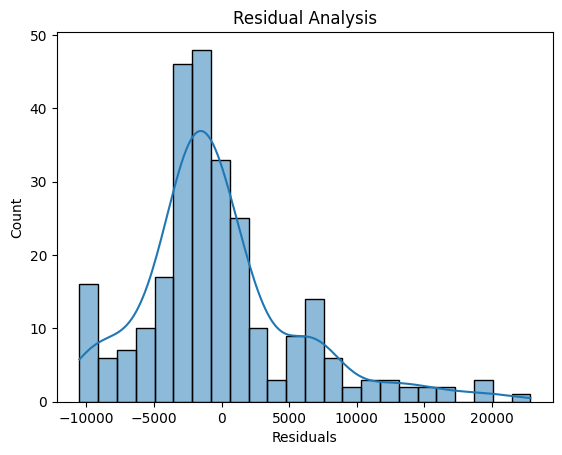

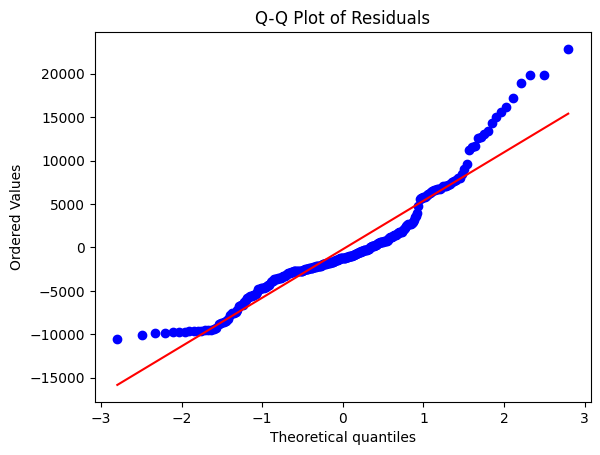

In [ ]:


# Residual plot
residuals = y_test - y_pred_multi
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Analysis")
plt.show()

# Q-Q Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Inferences: Step 6: Residual Analysis
Residual Plot: Shows a non-uniform distribution, indicating that some non-linear patterns exist.

Q-Q Plot: Shows deviations from normality, suggesting that our model might not fully capture the data's complexity.

📌 Conclusion:

Some non-linearity exists in the data, meaning a more advanced approach (e.g., feature engineering, polynomial regression, or regularization) may further improve predictions.

